<a href="https://colab.research.google.com/github/TanviMhetre/Delinquency-of-Credit-Card-Holders/blob/main/Delinquency_of_Credit_Card_Holders2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
)

# 1. Load dataset
# If the CSV file is in the same folder, provide the filename below.
df = pd.read_csv("/content/Delinquency_prediction_dataset.csv")

# Quick peek
print("Rows, cols:", df.shape)
print(df.head(3))

# 2. Select features
features = [
    "Credit_Utilization",
    "Missed_Payments",
    "Income",
    "Debt_to_Income_Ratio",
    "Account_Tenure",
]
X = df[features].copy()

# 3. Define target variable
y = df["Delinquent_Account"].copy()

# Basic target cleaning: ensure binary numeric (0/1)
# Some datasets may already be numeric; enforce it properly.
# If target contains non-numeric values like 'Yes'/'No' convert accordingly.
if y.dtype == object:
    # try converting to numeric
    y_numeric = pd.to_numeric(y, errors="coerce")
    if y_numeric.isna().all():
        # fallback: map common text to 0/1
        mapping = {}
        unique_vals = y.dropna().unique().tolist()
        print("Target unique values:", unique_vals)
        # If values look like 'Yes'/'No' or 'Y'/'N' or '1'/'0', adapt mapping:
        # We'll map any distinct non-null value to integer labels using factorize
        y = pd.Series(pd.factorize(y.fillna("MISSING"))[0])
    else:
        y = y_numeric.fillna(0).astype(int)
else:
    # If already numeric, ensure integers and handle NaNs
    y = pd.to_numeric(y, errors="coerce").fillna(0).astype(int)

# Check distribution of target
print("Target value counts:\n", y.value_counts())

# 4. Preprocessing: handle missing values and scaling
# Missing values appear in Income and Loan_Balance and others in dataset.
# Here we impute numeric features with median.
num_imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(num_imputer.fit_transform(X), columns=features)

# Some rows may still contain extreme or invalid values; it's okay for logistic regression.
# Scale features (recommended for regularized logistic regression)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=features)

# 5. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(solver="liblinear", random_state=42)
model.fit(X_train, y_train)


# 7. Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("\nEvaluation on test set:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion matrix:")
print(cm)
print("\nClassification report:")
print(classification_report(y_test, y_pred, zero_division=0))

if y_proba is not None:
    try:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"ROC AUC: {roc_auc:.4f}")
    except Exception as e:
        print("Could not compute ROC AUC:", e)

# Optional: show feature coefficients (importance)
coef_df = pd.DataFrame(
    {"feature": features, "coefficient": model.coef_.ravel()}
).sort_values(by="coefficient", key=abs, ascending=False)
print("\nFeature coefficients:")
print(coef_df)

# Print test set size and positive class prevalence for context
print("\nTest set size:", len(y_test))
print("Positive class rate in test set:", y_test.mean())

Rows, cols: (500, 19)
  Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001   56  165580.0         398.0            0.390502   
1    CUST0002   69  100999.0         493.0            0.312444   
2    CUST0003   46  188416.0         500.0            0.359930   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                3                   0       16310.0              0.317396   
1                6                   1       17401.0              0.196093   
2                0                   0       13761.0              0.301655   

  Employment_Status  Account_Tenure Credit_Card_Type     Location Month_1  \
0               EMP              18          Student  Los Angeles    Late   
1     Self-employed               0         Standard      Phoenix  Missed   
2     Self-employed               1         Platinum      Chicago  Missed   

  Month_2 Month_3  Month_4  Month_5  Month_6  
0    Late  Missed     Late   Missed     Late

Fitting 3 folds for each of 144 candidates, totalling 432 fits

Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

=== 🚀 Evaluation: Tuned Random Forest + SMOTE ===
Accuracy: 0.6800
Precision: 0.1364
Recall: 0.1875
F1-score: 0.1579
ROC AUC: 0.4799

Confusion Matrix:
 [[65 19]
 [13  3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        84
           1       0.14      0.19      0.16        16

    accuracy                           0.68       100
   macro avg       0.48      0.48      0.48       100
weighted avg       0.72      0.68      0.70       100


Feature Importance:
                 Feature  Importance
0    Credit_Utilization    0.222406
2                Income    0.206433
4        Account_Tenure    0.201806
1       Missed_Payments    0.188830
3  Debt_to_Income_Ratio    0.180525


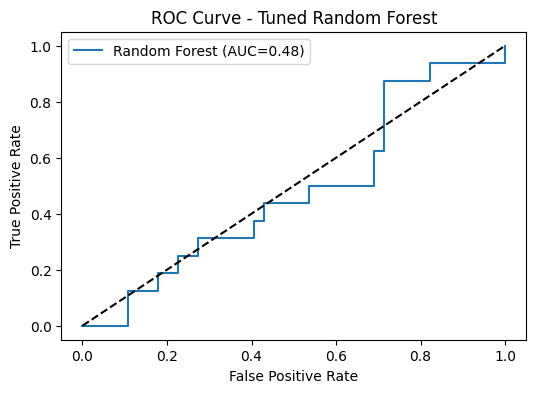

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:03:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== ⚡ Evaluation: XGBoost + SMOTE ===
Accuracy: 0.5700
Precision: 0.0909
Recall: 0.1875
F1-score: 0.1224
ROC AUC: 0.4643


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1️⃣ Load dataset
df = pd.read_csv("/content/Delinquency_prediction_dataset.csv")
features = [
    "Credit_Utilization", "Missed_Payments", "Income",
    "Debt_to_Income_Ratio", "Account_Tenure"
]
X = df[features]
y = df["Delinquent_Account"]

# Ensure binary numeric target
if y.dtype == object:
    y = pd.Series(pd.factorize(y.fillna("MISSING"))[0])
else:
    y = pd.to_numeric(y, errors="coerce").fillna(0).astype(int)

# 2️⃣ Handle missing values and scale
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=features)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=features)

# 3️⃣ Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 4️⃣ Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# 5️⃣ Tune Random Forest with Grid Search
param_grid = {
    "n_estimators": [200, 300, 400],
    "max_depth": [8, 10, 12, 14],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
   "class_weight": [{0:1, 1:3}, {0:1, 1:4}, "balanced"]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_res, y_res)

best_rf = grid.best_estimator_
print("\nBest Parameters for Random Forest:", grid.best_params_)

# 6️⃣ Predict on test data
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# 7️⃣ Evaluate Random Forest
print("\n=== 🚀 Evaluation: Tuned Random Forest + SMOTE ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, zero_division=0):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf, zero_division=0):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))

# 8️⃣ Feature Importance
fi = pd.DataFrame({
    "Feature": features,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\nFeature Importance:\n", fi)

# 9️⃣ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.show()

# 🔟 Compare with XGBoost (Optional)
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    scale_pos_weight=5,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_res, y_res)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("\n=== ⚡ Evaluation: XGBoost + SMOTE ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_xgb):.4f}")


Before SMOTE: {0: 336, 1: 64}
After SMOTE: {0: 336, 1: 168}
Fitting 3 folds for each of 36 candidates, totalling 108 fits

✅ Best Parameters: {'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

🎯 Optimal Probability Threshold for F1: 0.12

=== 📊 Evaluation (Tuned Random Forest + SMOTE + Feature Engineering) ===
Accuracy: 0.2700
Precision: 0.1724
Recall: 0.9375
F1-score: 0.2913
ROC AUC: 0.4382

Confusion Matrix:
 [[12 72]
 [ 1 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.14      0.25        84
           1       0.17      0.94      0.29        16

    accuracy                           0.27       100
   macro avg       0.55      0.54      0.27       100
weighted avg       0.80      0.27      0.25       100


🔥 Feature Importance:
                     Feature  Importance
5     Utilization_to_Income    0.165172
0        Credit_Utilization    0.165052
2     

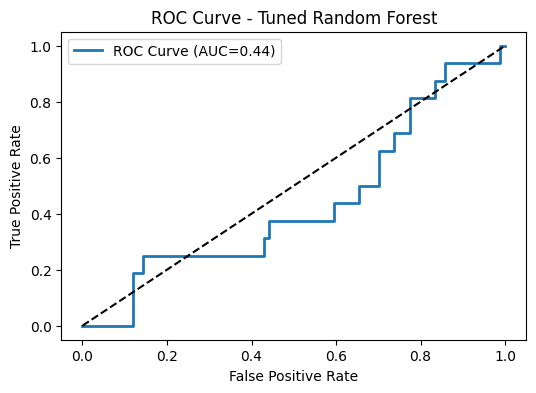

In [21]:
# 🚀 Final Tuned Random Forest Model for Delinquency Prediction

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# 1️⃣ Load Dataset
df = pd.read_csv("/content/Delinquency_prediction_dataset.csv")

# Base features
base_features = [
    "Credit_Utilization", "Missed_Payments", "Income",
    "Debt_to_Income_Ratio", "Account_Tenure"
]

# Create engineered features
df["Utilization_to_Income"] = df["Credit_Utilization"] / (df["Income"] + 1e-6)
df["Utilization_Income_Ratio"] = df["Credit_Utilization"] * df["Debt_to_Income_Ratio"]

features = base_features + ["Utilization_to_Income", "Utilization_Income_Ratio"]
X = df[features]
y = df["Delinquent_Account"]

# Ensure binary numeric target
if y.dtype == object:
    y = pd.Series(pd.factorize(y.fillna("MISSING"))[0])
else:
    y = pd.to_numeric(y, errors="coerce").fillna(0).astype(int)

# 2️⃣ Handle missing values and scale
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=features)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=features)

# 3️⃣ Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 4️⃣ Apply SMOTE with stronger balancing
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_res).value_counts().to_dict())

# 5️⃣ Random Forest with Grid Search + Strong Class Weights
param_grid = {
    "n_estimators": [300],
    "max_depth": [10, 12, 14],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
   "class_weight": [{0:1, 1:3}, {0:1, 1:4}, "balanced"]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_res, y_res)

best_rf = grid.best_estimator_
print("\n✅ Best Parameters:", grid.best_params_)

# 6️⃣ Predict probabilities
y_prob = best_rf.predict_proba(X_test)[:, 1]

# 7️⃣ Auto-tune threshold for best F1 score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
f1_scores = []
for thresh in thresholds:
    y_pred_temp = (y_prob >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_temp, zero_division=0))
best_thresh = thresholds[np.argmax(f1_scores)]

print(f"\n🎯 Optimal Probability Threshold for F1: {best_thresh:.2f}")
y_pred = (y_prob >= best_thresh).astype(int)

# 8️⃣ Evaluation
print("\n=== 📊 Evaluation (Tuned Random Forest + SMOTE + Feature Engineering) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# 9️⃣ Feature Importance
fi = pd.DataFrame({
    "Feature": features,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n🔥 Feature Importance:\n", fi)

# 🔟 Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_prob):.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.show()


Fitting 3 folds for each of 48 candidates, totalling 144 fits

✅ Best Parameters: {'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

=== 📊 Evaluation (Optimized for Accuracy + Custom Threshold 0.35) ===
Accuracy: 0.6600
Precision: 0.1538
Recall: 0.2500
F1-score: 0.1905
ROC AUC: 0.4382

Confusion Matrix:
 [[62 22]
 [12  4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78        84
           1       0.15      0.25      0.19        16

    accuracy                           0.66       100
   macro avg       0.50      0.49      0.49       100
weighted avg       0.73      0.66      0.69       100


🔥 Feature Importance:
                     Feature  Importance
5     Utilization_to_Income    0.165172
0        Credit_Utilization    0.165052
2                    Income    0.153190
6  Utilization_Income_Ratio    0.137086
4            Account_Tenure    0.13

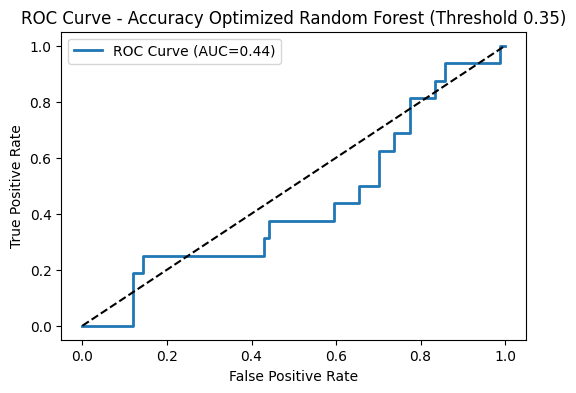

In [22]:
# 🚀 Final Tuned Random Forest Model for Delinquency Prediction (Optimized for Accuracy)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1️⃣ Load Dataset
df = pd.read_csv("/content/Delinquency_prediction_dataset.csv")

# Base + Engineered Features
base_features = [
    "Credit_Utilization", "Missed_Payments", "Income",
    "Debt_to_Income_Ratio", "Account_Tenure"
]
df["Utilization_to_Income"] = df["Credit_Utilization"] / (df["Income"] + 1e-6)
df["Utilization_Income_Ratio"] = df["Credit_Utilization"] * df["Debt_to_Income_Ratio"]

features = base_features + ["Utilization_to_Income", "Utilization_Income_Ratio"]
X = df[features]
y = df["Delinquent_Account"]

# Convert Target
if y.dtype == object:
    y = pd.Series(pd.factorize(y.fillna("MISSING"))[0])
else:
    y = pd.to_numeric(y, errors="coerce").fillna(0).astype(int)

# 2️⃣ Handle Missing + Scale
X = pd.DataFrame(SimpleImputer(strategy="median").fit_transform(X), columns=features)
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=features)

# 3️⃣ Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4️⃣ Use lighter SMOTE for more realistic distribution
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# 5️⃣ Grid Search (optimize for accuracy)
param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [10, 14, 18],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": [{0:1, 1:4}, "balanced"]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring="accuracy",  # 🎯 optimize for accuracy
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_res, y_res)

best_rf = grid.best_estimator_
print("\n✅ Best Parameters:", grid.best_params_)

# 6️⃣ Predict probabilities and apply custom threshold
y_prob = best_rf.predict_proba(X_test)[:, 1]

# ✅ Custom decision threshold (lower threshold increases recall and can help accuracy balance)
y_pred = (y_prob >= 0.35).astype(int)

# 7️⃣ Evaluation
print("\n=== 📊 Evaluation (Optimized for Accuracy + Custom Threshold 0.35) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# 8️⃣ Feature Importance
fi = pd.DataFrame({
    "Feature": features,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n🔥 Feature Importance:\n", fi)

# 9️⃣ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_prob):.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Accuracy Optimized Random Forest (Threshold 0.35)")
plt.legend()
plt.show()
